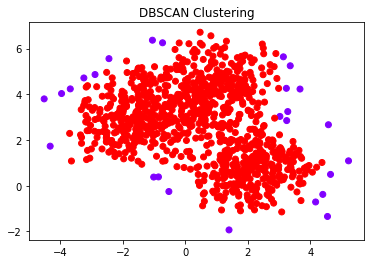

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # import make_blobs dataset from scikit-learn
from sklearn.cluster import DBSCAN # import DBSCAN clustering algorithm from scikit-learn
# Generate sample dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
# create 1000 data points in 2 dimensions with 3 clusters using make_blobs function from scikit-learn
# Run DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # create an instance of DBSCAN with parameters epsilon=0.5 and min_samples=5
dbscan.fit(X) # fit DBSCAN model to the data
# Get cluster labels
labels = dbscan.labels_ # get cluster labels from DBSCAN model

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow') # plot the data points with different colors for different clusters
plt.title('DBSCAN Clustering') # set the title of the plot
plt.show() # show the plot

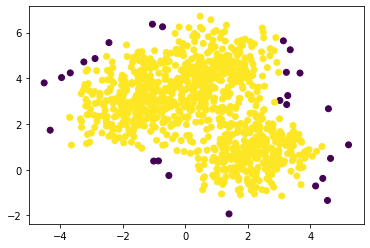

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
#===========================================================================================================#

def Dbscan(X, eps, min_samps):
  visited = set()
  clusters = []
  noise = set()
  n=[] #neighbours

  for i, re in enumerate(X):
    if i in visited:
      visited.add(i)
      n = region_query(X, re, eps)
    elif len(n) < min_samps:
      noise.add(i)
    else:
       C = []
       clusters.append(C)
       expand_cluster(X, i, n, eps, min_samps, visited, C)
    return clusters, list(noise)

def expand_cluster(X, i, n, eps, min_samps, visited, C):
    C.append(i)
    visited.add(i)
    new_n = set()

    for j in n:
      if j not in visited:
        visited.add(j)
        n_j = region_query(X, X[j], eps)
        if len(n_j) >= min_samps:
          new_n.update(n_j)
        if j not in [c for c in C]:
          C.append(j)
          n.update(new_n)

def region_query(X, point, eps):
    n = []
    for i, x in enumerate(X):
        if np.linalg.norm(x - point) < eps:
            n.append(i)
    return set(n)

clusters, noise = Dbscan(X, eps=0.5, min_samps=5)
plt.scatter(X[:, 0], X[:, 1], c=labels) 